In [1]:
import pandas as pd

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore',category=UserWarning,module='openpyxl')

In [4]:
Kayaking=pd.read_excel(r"C:\Users\fenny\OneDrive\Desktop\V02Max_Combined.xlsx",sheet_name=0)
Athletes=pd.read_excel(r"C:\Users\fenny\OneDrive\Desktop\V02Max_Combined.xlsx",sheet_name=1)
Triathlon=pd.read_excel(r"C:\Users\fenny\OneDrive\Desktop\V02Max_Combined.xlsx",sheet_name=2)
Fencing=pd.read_excel(r"C:\Users\fenny\OneDrive\Desktop\V02Max_Combined.xlsx",sheet_name=3)


In [5]:
import numpy as np

In [8]:
#Normalizing the column names to lowercase
Kayaking.columns=Kayaking.columns.str.lower()
Athletes.columns=Athletes.columns.str.lower()
Triathlon.columns=Triathlon.columns.str.lower()
Fencing.columns=Fencing.columns.str.lower()

#Column lists that we want o keep
columns_kept=['time','rr','power','vo2']

#Add missing columns with NaN values if they don't exist
def missing_columns(df,columns):
    for col in columns:
        if col not in df.columns:
            #adding missing columns with NaN values
            df[col]=np.nan

missing_columns(Kayaking,columns_kept)
missing_columns(Athletes,columns_kept)
missing_columns(Triathlon,columns_kept)
missing_columns(Fencing,columns_kept)

df=[Kayaking,Triathlon,Fencing]
Merged_df=pd.merge(Kayaking,Triathlon,how='outer').merge(Fencing,how='outer')

#Write the final dataframe to an excel file
Merged_df.to_excel("MergedV02.xlsx",index=False)

print("Merged Dataframe saved to excel successfully")


Merged Dataframe saved to excel successfully


In [9]:
# Label Warm up which has all negative time values
Merged_df.loc[Merged_df['time'] < 0, 'status'] = 'Warm up'

# Label GET which has time >= 0 and power > 0
Merged_df.loc[(Merged_df['time'] >= 0) & (Merged_df['power'] > 0), 'status'] = 'GET'

# By assuming cool down starts immediately after GET stage ends:
# It will be all rows where power drops to zero or very low value
Merged_df.loc[(Merged_df['time'] >= 0) & (Merged_df['power'] == 0), 'status'] = 'Cool down'

print(Merged_df[['id','time','rr','power','vo2','status']])

# Save the final labeled dataframe to an Excel file
Merged_df.to_excel("V02Max_Labeled.xlsx", index=False)

print("Labeled dataframe saved to excel successfully")


       id     time     rr  power       vo2     status
0      11 -168.600  727.0      0  0.287147    Warm up
1      11 -167.872  728.0      0  0.287147    Warm up
2      11 -167.148  724.0      0  0.287147    Warm up
3      11 -166.484  664.0      0  0.320580    Warm up
4      11 -165.836  648.0      0  0.320580    Warm up
...    ..      ...    ...    ...       ...        ...
52057  10  942.700  428.0      0  0.786363  Cool down
52058  10  943.124  424.0      0  0.786363  Cool down
52059  10  943.552  428.0      0  0.786363  Cool down
52060  10  943.976  424.0      0  0.786363  Cool down
52061  10  944.404  428.0      0  0.786363  Cool down

[52062 rows x 6 columns]
Labeled dataframe saved to excel successfully


In [10]:
#Ques 65: Use array slicing to display elements 4,7,10,17
#Create list of lists and then use array[row index][column index]
Array=[[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25],[26,27,28,29,30]]
El_1 = Array[0][3]
El_2=Array[1][1]
El_3=Array[1][4]
El_4=Array[3][1]

print(El_1)
print(El_2)
print(El_3)
print(El_4)

4
7
10
17


In [13]:
#Ques 66: on average, how long did each participant spend at 200 watts
#Create a dataframe from MergedV02
df_200Watts=Merged_df[Merged_df['power']==200]

#calculate time spent for each participant at 200 watts by creating a new column
df_200Watts.loc[: ,('timespent')]=df_200Watts.groupby('id')['time'].diff().fillna(0)
#used .loc for label based indexing using row and column labels as the code showed error

#sum the time for each participant
Total_time=df_200Watts.groupby('id')['timespent'].sum()

#calculate the average for each participant
Average_time=Total_time.mean()

print(f"On average, each participant spends {Average_time} time units at 200 watts.")

On average, each participant spends 50.5843076923077 time units at 200 watts.


C:\Users\fenny\AppData\Local\Temp\ipykernel_30064\2476752566.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_200Watts.loc[: ,('timespent')]=df_200Watts.groupby('id')['time'].diff().fillna(0)


In [15]:
#Ques 67: Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?
Merged_df['Total_V02']=Merged_df.groupby('id')['vo2'].transform('sum')
#this creates a column by summing v02 for each participant

#merge dataframes to get the sports column
Merged_df_athletes = pd.merge(Merged_df,Athletes[['id','sport']],on='id',how='left')

#calculate average vo2 for each sport
avg_vo2_sport=Merged_df_athletes.groupby('sport')['vo2'].mean()

avg_vo2_sport_max=avg_vo2_sport.idxmax()

highest_vo2_value=avg_vo2_sport.max()

print(f"{avg_vo2_sport_max} has the highest average cardiorespiratory fitness with max v02 {highest_vo2_value}")

kayak has the highest average cardiorespiratory fitness with max v02 1.8338044528651811


In [75]:
#Ques 68: What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)
#merge table for age column
Merged_Age1_df=pd.merge(Merged_df,Athletes[['id','age']],on='id',how='left')

#calculate HR by using RR
Merged_Age1_df['hr']=60/(Merged_Age1_df['rr']/1000)

#calculate HRmax = 220-age
Merged_Age1_df['Max_hr']=220-Merged_Age1_df['age']
Merged_Age1_df['Max_hr_90per']=0.9*Merged_Age1_df['Max_hr']

Merged_Age1_df['Exceed_90per']=Merged_Age1_df['hr']>Merged_Age1_df['Max_hr_90per']

Ex_90per_Count=Merged_Age1_df['Exceed_90per'].sum()

#Total athletes
Total_ath=Merged_df['id'].count()

per_exceed=(Ex_90per_Count/Total_ath)*100

print(f"{per_exceed:.2f}% of atheletes exceeded 90%.")


6.91% of atheletes exceeded 90%.


In [17]:
#Ques 69: What was the lowest heart rate recorded at a power wattage of 200
df_200Watts=Merged_df[Merged_df['power']==200].copy()

df_200Watts['low_HR']=60/(df_200Watts['rr']/1000)

Lowest_hr=df_200Watts['low_HR'].min()

print(f"On average, lowest hr is {Lowest_hr} at 200 watts.")

On average, lowest hr is 71.77033492822967 at 200 watts.


In [83]:
#Ques 70: On average how long did most athletes spend at 75% of MaxHR (Max HR is calculate as 220-Age)
#Merge the Atheletes table for age
Merged_df_Age=pd.merge(Merged_df,Athletes[['id','age']],on='id',how='left')

#get Max HR
Merged_df_Age['HR']=60/(Merged_df_Age['rr']/1000)
Merged_df_Age['Max_HR1']=220-Merged_df_Age['age']
Merged_df_Age['Max_HR1_75per']=.75*Merged_df_Age['Max_HR1']

#filter rows where HR is 75% of MaxHR
Time_75_HR=Merged_df_Age[Merged_df_Age['HR']>=Merged_df_Age['Max_HR1_75per']]

Total_time=Time_75_HR.groupby('id')['time'].sum()

Average_time=Total_time.mean()

print(f"On average, athletes spent {Average_time} time at 75% of Max HR.")


On average, athletes spent 879390.1308888891 time at 75% of Max HR.


In [106]:
#Ques 71:Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows 
#that satisfy each condition as values

#merge to get the sport column
Merged_df_sport=pd.merge(Merged_df,Athletes[['id','sport','age']],on='id',how='left')

#calculate hr
Merged_df_sport['hr']=60/(Merged_df_sport['rr']/1000)
Merged_df_sport['Max_hr_f']=220-Merged_df_sport['age']

Merged_df_sport['HR_Percent']=Merged_df_sport['hr']/Merged_df_sport['Max_hr_f']

#make heart rate zones
def cat_HR_Zone(HR_Percent):
    if (HR_Percent>=0.50) & (HR_Percent<0.60):
        return 'Zone 1 (50-60%)'
    elif (HR_Percent>=0.60) & (HR_Percent<0.70):
        return 'Zone 2 (60-70%)'
    elif (HR_Percent>0.70) & (HR_Percent <0.80):
        return 'Zone 3 (70-80%)'
    elif (HR_Percent>=0.80) & (HR_Percent<0.90):
        return 'Zone 4 (80-90%)'
    elif (HR_Percent>0.90):
        return 'Zone 5 (90% and above)'
    else:
        return 'Not Known'

#Apply the function to create the zone column
Merged_df_sport['HR_Zone']=Merged_df_sport['HR_Percent'].apply(cat_HR_Zone)

#create a crosstab
Crosstab_HR_Zone=pd.crosstab(Merged_df_sport['HR_Zone'],Merged_df_sport['sport'])
print(Crosstab_HR_Zone)

sport                   fencing  kayak  triathlon
HR_Zone                                          
Not Known                  2385   2248        909
Zone 1 (50-60%)            4205   3246        479
Zone 2 (60-70%)            5654   4594       1409
Zone 3 (70-80%)            5920   3867        871
Zone 4 (80-90%)            7209   4365       1101
Zone 5 (90% and above)     2230   1158        212


In [18]:
#Ques 72: Provide an example of a lambda function that multiplies any 2 input values
x=lambda a,b: a*b
print(x(7,8))    

56


In [20]:
#Ques 73: how long was athlete 17's warm up
#filter the result for id 17 during warm up phase
Warm_id_17=Merged_df[(Merged_df['id']==17)&(Merged_df['time']<0)]

warm_up_duration=Warm_id_17['time'].abs().sum()

print(f"Particpant 17's total warm up time is {warm_up_duration}.")

Particpant 17's total warm up time is 21963.832.


In [22]:
#Ques 74: take a student's full name and reverse it using a for loop
#concatenate first name and last name and reverse the string with location-based indexing
reversed_full_name1=[(Athletes.loc[i,'first name']+" "+Athletes.loc[i,'last name'])[::-1] for i in range(len(Athletes))]

print(reversed_full_name1)

['zenitraM aivilO', 'sdlonyeR nahtE', 'repraH noskcaJ', 'zehcnaS maiL', 'nospmohT avA', 'zeugirdoR aihpoS', 'snommiS ecarG', 'ttenneB nediA', 'ecirP eolhC', 'nadroJ yliL', 'niffirG allebasI', 'noxiD belaC', 'retnepraC aiM', 'llehctiM repraH', 'ecallaW nosaM', 'nosrednA nagoL', 'retsoF sacuL', 'sreyM newO']


In [52]:
#Ques 75: What was the maximum heart rate recorded during the test. Which athlete did it belong to? Display name, sport and HR
#merge to make a new df
Merged_Name_df = pd.merge(Merged_df,Athletes[['id','first name','sport']],on='id',how='left')
#find the calue of hr
Merged_df['hr']=60/(Merged_df['rr']/1000)
#find max hr
max_hr=Merged_Name_df.loc[Merged_Name_df['hr'].idxmax()]
#extract the name, sport and max hr
ath_name=max_hr['first name']
ath_sport=max_hr['sport']
ath_hr=max_hr['hr']

print(f"The max HR recorded for {ath_name} in {ath_sport} was {ath_hr}.")

The max HR recorded for Grace in fencing was 238.0952380952381.


In [59]:
#Ques 76: np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.
#create and array of numbers from 1 to 30 and make it a 6*5 array
array = [[1, 2, 3, 4, 5],
 [6, 7, 8, 9, 10],   
 [11, 12, 13, 14, 15],   
 [16, 17, 18, 19, 20],
 [21, 22, 23, 24, 25],
 [26, 27, 28, 29, 30]]

In [61]:
Final_Result=[array[0][1],array[0][4],array[2][2],array[4][4],array[5][4]]
print(Final_Result)

[2, 5, 13, 25, 30]


In [23]:
pip install seaborn

In [24]:
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns

<Axes: xlabel='age', ylabel='vo2_max'>

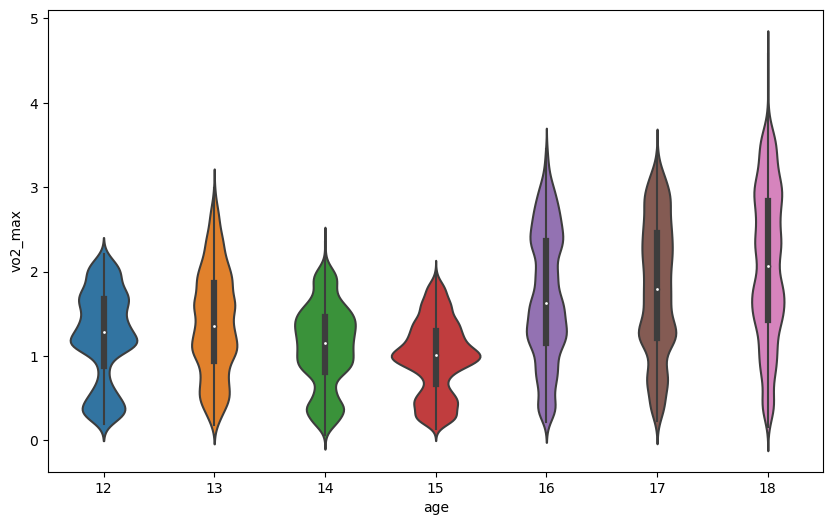

In [28]:
#Ques 77: Display a violin chart to show distribution of VO2Max against age.
#merge Merged_df with df2 to get the age column
Merged_age_df=pd.merge(Merged_df,Athletes[['id','age']],on='id',how='left')

#finding vo2 max value for each participant
Merged_age_df['vo2_max']=Merged_age_df.groupby(id)['vo2'].transform('max')

plt.figure(figsize=(10,6))

sns.violinplot(x='age',y='vo2_max',data=Merged_age_df)


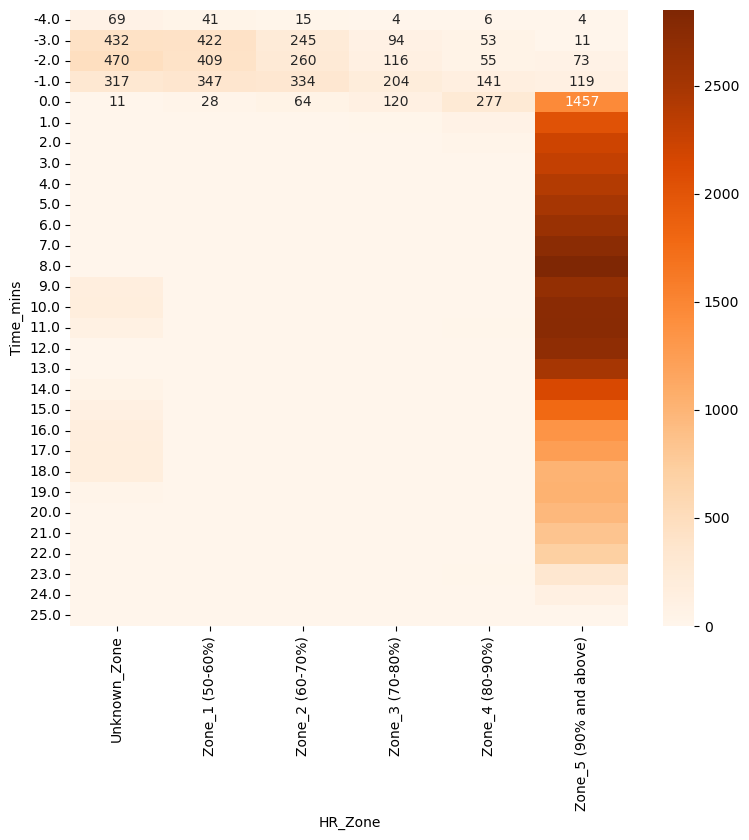

In [136]:
#Ques 78:Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute
#calculate HR
Merged_df['HR2']=60/(Merged_df['rr']/1000)
#calculate Max HR
Merged_df['Max_HR2']=220-Merged_df['HR2']
#calculate HR percentage
Merged_df['HR_Per2']=Merged_df['HR2']/Merged_df['Max_HR2']

#make HR Zones using if else
def Zone_cat1_hr(HR_Per2):
    if HR_Per2>=.50 and HR_Per2<.60:
        return 'Zone_1 (50-60%)'
    elif HR_Per2>=.60 and HR_Per2<.70:
        return 'Zone_2 (60-70%)'
    elif HR_Per2>=.70 and HR_Per2<.80:
        return 'Zone_3 (70-80%)'
    elif HR_Per2>=.80 and HR_Per2<.90:
        return 'Zone_4 (80-90%)'
    elif HR_Per2>=.90: 
        return 'Zone_5 (90% and above)'
    else: 
        return 'Unknown_Zone'
 
Merged_df['HR_Zone']=Merged_df['HR_Per2'].apply(Zone_cat1_hr)

#convert time to mins from secs
Merged_df['Time_mins']=Merged_df['time']//60

Heatmap_data=Merged_df.pivot_table(index='Time_mins',columns='HR_Zone',aggfunc='size',fill_value=0)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,8))
sns.heatmap(Heatmap_data, annot=True, fmt='d', cmap='Oranges')

plt.show()


([<matplotlib.patches.Wedge at 0x2604db9ff50>,
 [Text(-0.5499999207186961, -0.9526279899359603, 'Female'),
  Text(0.5499998315272243, 0.9526280414306652, 'Male')],
 [Text(-0.29999995675565233, -0.5196152672377965, '56%'),
  Text(0.2999999081057587, 0.5196152953258173, '44%')])

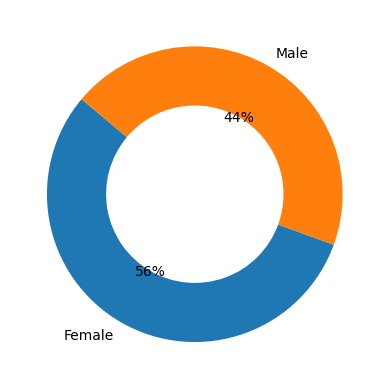

In [31]:
#Ques 79: Plot the Donut chart athlete distrubution by Gender
gender_dist=Athletes['gender'].value_counts()

labels=[gender_dist.index]
sizes=[gender_dist.values]
colors=['blue','green']

plt.pie(gender_dist.values,labels=gender_dist.index,autopct='%1.0f%%',startangle=140,wedgeprops=dict(width=0.4))

In [34]:
#Ques 80: #find the size of a tuple for any given input
first_name_tuple=tuple(Athletes['first name'])

tuple_size=len(first_name_tuple)

print(f"tuple of first names:{first_name_tuple}")

print(f"size of the tuple:{tuple_size}")

tuple of first names:('Olivia', 'Ethan', 'Jackson', 'Liam', 'Ava', 'Sophia', 'Grace', 'Aiden', 'Chloe', 'Lily', 'Isabella', 'Caleb', 'Mia', 'Harper', 'Mason', 'Logan', 'Lucas', 'Owen')
size of the tuple:18


In [152]:
#Extra ques: Is there a significant difference in power output (power) between athletes of different sports?
#filter athletes for each sport, and find the median and mean for power using filter and mean(),['power']

#merge athletes to get sport
Merged_df_Athletes = pd.merge(Merged_df,Athletes[['id','sport','age']],on='id',how='left')

#find the mean and median power output for each sport 
Mean_power_sport = Merged_df_Athletes.groupby('sport')['power'].mean()
Median_power_sport = Merged_df_Athletes.groupby('sport')['power'].median()
Std_power_sport = Merged_df_Athletes.groupby('sport')['power'].std()

print("Mean power for each sport:\n",Mean_power_sport)
print("Median power for each sport:\n",Median_power_sport)
print("Std power for each sport:\n",Std_power_sport)


Mean power for each sport:
 sport
fencing       98.598703
kayak        124.307680
triathlon     80.950612
Name: power, dtype: float64
Median power for each sport:
 sport
fencing       95.0
kayak        125.0
triathlon     80.0
Name: power, dtype: float64
Std power for each sport:
 sport
fencing      84.119425
kayak        96.660185
triathlon    63.794937
Name: power, dtype: float64


In [145]:
from scipy.stats import f_oneway

In [149]:
#create a list of power values for each sport
Merged_df_Sport_Power=Merged_df_Athletes.groupby('sport')['power'].apply(list)

#perform the anova test
Anova_Values=f_oneway(*Merged_df_Sport_Power)

print(f"Anova values:", Anova_Values)

Anova values: F_onewayResult(statistic=730.120342211344, pvalue=1.898542562e-313)


In [160]:
#Extra ques: Find the average power output by age group

#define age groups
bins=[0,12,14,16,18]
labels=['12-14','14-16','16-18','18+']
Merged_df_Athletes['Age_grp']=pd.cut(Merged_df_Athletes['age'],bins=bins,labels=labels,right=False)

#calculate mean power by age group
Merged_df_AgePower=Merged_df_Athletes.groupby('Age_grp')['power'].mean()

print(Merged_df_AgePower)

Age_grp
12-14           NaN
14-16     88.812977
16-18     72.958982
18+      121.998277
Name: power, dtype: float64


C:\Users\fenny\AppData\Local\Temp\ipykernel_30064\1150200133.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Merged_df_AgePower=Merged_df_Athletes.groupby('Age_grp')['power'].mean()


In [162]:
#Extra ques: find correlation between age and power
Corr_Age_Power=Merged_df_Athletes[['age','power']].corr().loc['age','power']

print(f"Correlation between age and power is: {Corr_Age_Power}")

Correlation between age and power is: 0.2435671219038397
